In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np


In [65]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [66]:
dataset=pd.read_csv("concrete.csv")
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### We can see all columns are numerical however lets confirm it wether there is any column type object

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [68]:
## Function for cheking the missing values
def missingValues(df):
    print("The number of missing values")
    for i in df:
        count=0
        if df[i].isnull==True:
            count+=1
        print(i,":",count)

In [69]:
#Function to visualise outliers
def PlotOutliers(df):
    print("Visualising outliers.................")
    for i in df:
        fig=plt.figure()
        sns.boxplot(df[i])

In [70]:
#Function to number of outliers
def outliers_cc(df):
    print("No of outliers.....................")
    for i in df:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lowerbound=Q1-1.5*IQR
        upperbound=Q3+1.5*IQR
        cnt=0
        for k in df[i].values:
            if (k<lowerbound or k>upperbound):
                cnt+=1
        print(i,'=','Q1: ',Q1,'Q3: ',Q3,'IQR: ',IQR,'lowerbound: ',lowerbound,'upperbound: ',upperbound,'outlier count: ',cnt)


The number of missing values
cement : 0
slag : 0
ash : 0
water : 0
superplastic : 0
coarseagg : 0
fineagg : 0
age : 0
strength : 0
No of outliers.....................
cement = Q1:  192.375 Q3:  350.0 IQR:  157.625 lowerbound:  -44.0625 upperbound:  586.4375 outlier count:  0
slag = Q1:  0.0 Q3:  142.95 IQR:  142.95 lowerbound:  -214.42499999999998 upperbound:  357.375 outlier count:  2
ash = Q1:  0.0 Q3:  118.3 IQR:  118.3 lowerbound:  -177.45 upperbound:  295.75 outlier count:  0
water = Q1:  164.9 Q3:  192.0 IQR:  27.099999999999994 lowerbound:  124.25000000000001 upperbound:  232.64999999999998 outlier count:  9
superplastic = Q1:  0.0 Q3:  10.2 IQR:  10.2 lowerbound:  -15.299999999999999 upperbound:  25.5 outlier count:  10
coarseagg = Q1:  932.0 Q3:  1029.4 IQR:  97.40000000000009 lowerbound:  785.8999999999999 upperbound:  1175.5000000000002 outlier count:  0
fineagg = Q1:  730.9499999999999 Q3:  824.0 IQR:  93.05000000000007 lowerbound:  591.3749999999998 upperbound:  963.575 ou

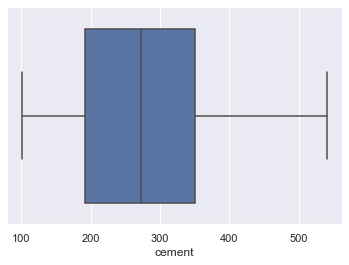

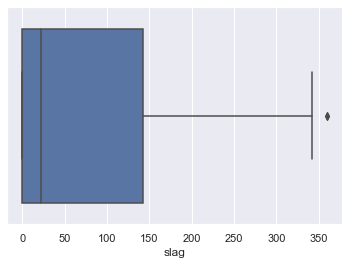

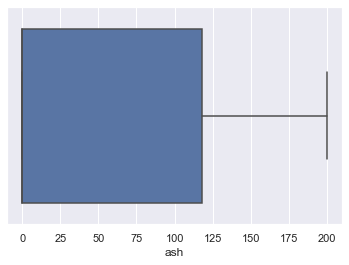

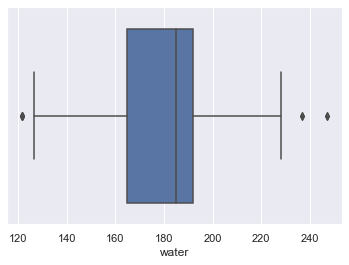

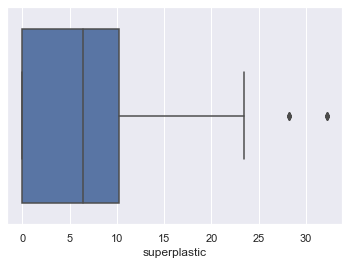

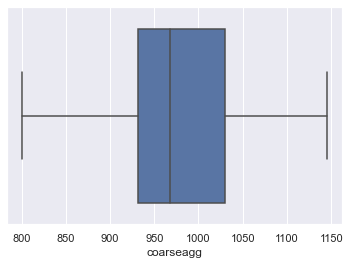

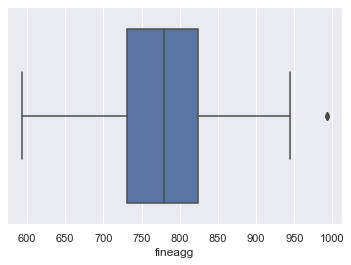

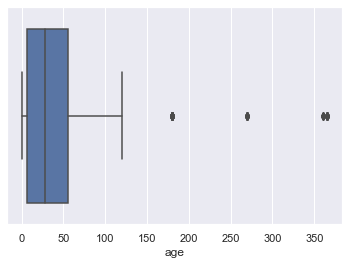

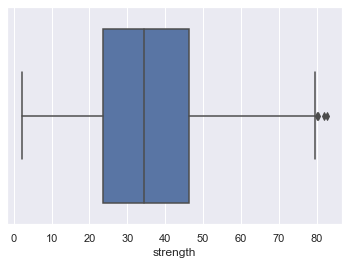

In [71]:
# Passing all functions through pipeline
pipe=make_pipeline((missingValues(dataset)),(outliers_cc(dataset)),(PlotOutliers(dataset)))

##  Let us do a pair plot analysis to visually check number of likely clusters

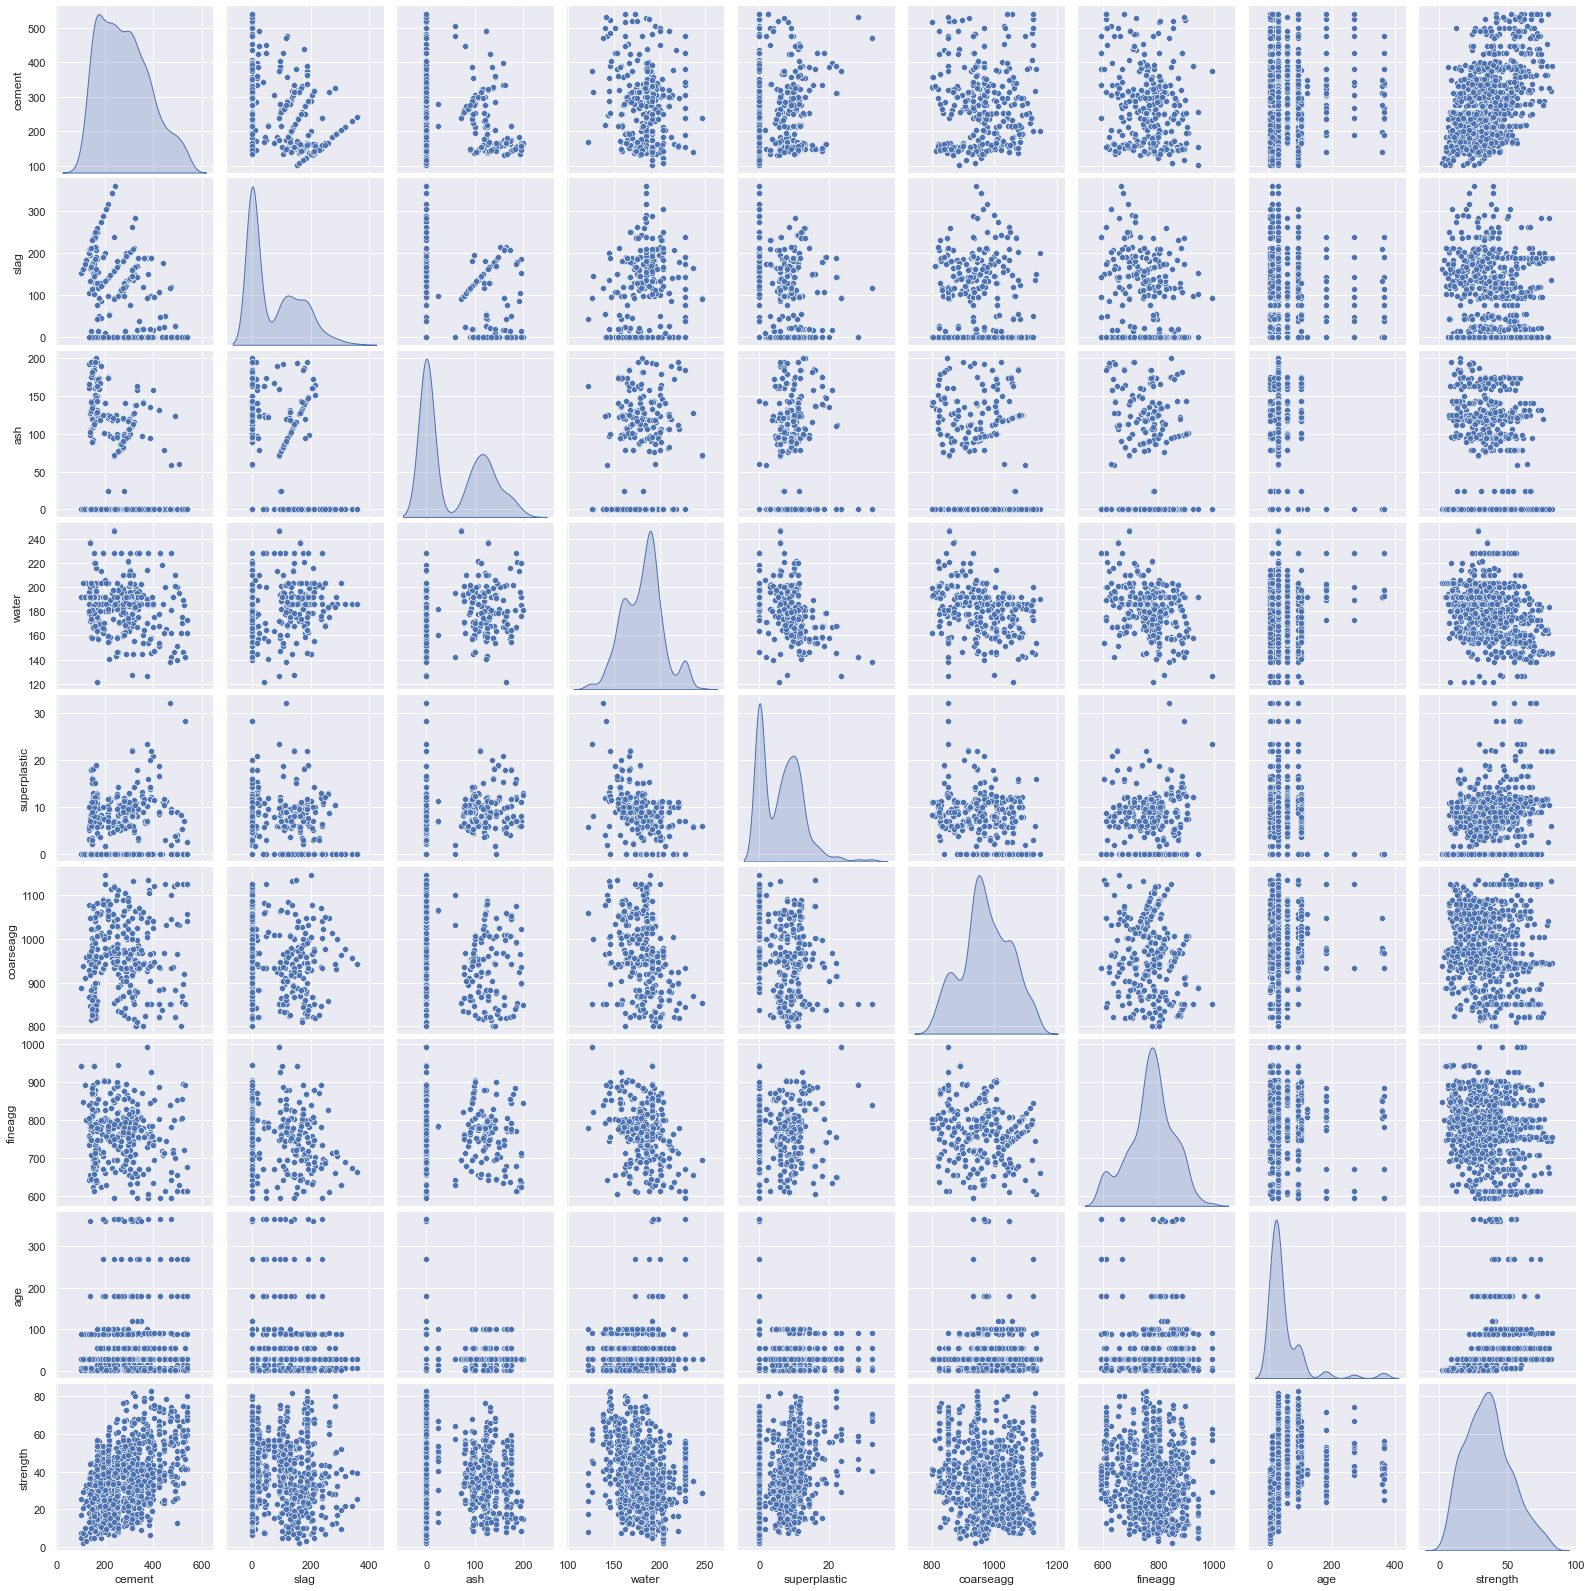

In [72]:
sns.pairplot(dataset.iloc[:,0:],diag_kind='kde')

### Splitting and standardizing data

In [73]:
X = dataset.drop(['strength'],axis=1).apply(sts.zscore)

In [74]:
# Splitting the data 
Y=dataset['strength']
# X=dataset.drop(['strength'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [75]:
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,0.658961,-0.856888,-0.847144,1.004164,-1.039143,0.013910,0.017714,-0.501465
286,0.888723,1.337055,-0.847144,-0.537264,0.652383,-0.602435,-0.210645,0.718062
600,-0.039901,-0.856888,-0.847144,0.441941,-1.039143,-0.063294,1.028482,-0.675683
691,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,-0.612331
474,0.716401,-0.856888,1.372788,0.535645,0.803113,-2.212138,0.055149,-0.279733


In [76]:
X_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
339,-0.432412,0.963667,-0.847144,0.488793,-1.039143,-0.004104,-0.305483,0.702224
244,1.070619,-0.856888,-0.847144,0.488793,-1.039143,-0.423579,-0.194423,0.702224
882,-0.647814,-0.856888,1.876181,-1.263468,0.920347,1.021422,0.023953,-0.501465
567,-1.207861,1.265160,-0.847144,0.535645,0.468157,0.953226,-0.955619,-0.279733
923,0.276023,-0.856888,-0.847144,0.488793,-1.039143,-0.037559,0.953610,-0.612331


## Building Model on Raw Data

In [77]:
clr = svm.SVR()  
t=clr.fit(X_train , y_train)

In [78]:
y_pred = clr.predict(X_test)

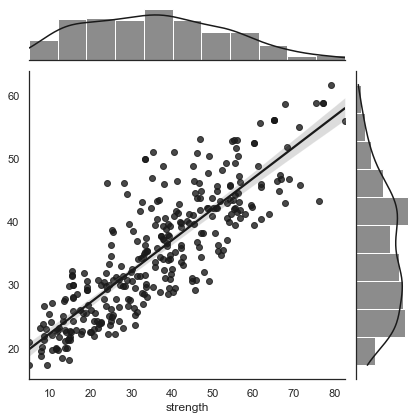

In [79]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
